# IC 4.10 Part 1 Data Privacy and low-activity customers data exclusion

1. Import libraries
2. Handling PII/Data Privacy by creating age and income into groups
3. Regional segmentation of the data
4. Excluding low-activity customers

## 1. Import libraries

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import scipy

In [5]:
#import data
path = r"C:\Users\hp\08-08-2024 Instacart Basket Analysis"

In [6]:
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_ords_prods.pkl'))

In [7]:
ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 float64
 1   first_name              object 
 2   last_name               object 
 3   gender                  object 
 4   state                   object 
 5   age                     int64  
 6   date_joined             object 
 7   dependants              int64  
 8   family_status           object 
 9   income                  int64  
 10  product_id              float64
 11  product_name            object 
 12  aisle_id                int16  
 13  department_id           int16  
 14  prices                  float32
 15  order_id                int32  
 16  order_number            int16  
 17  order_dow               int8   
 18  order_hour_of_day       int8   
 19  days_since_prior_order  float32
 20  add_to_cart_order       float16
 21  reordered               float

The sensitive data here is first and last name, gender, family status, state, and income. These are the Personally Identifiable Information in our dataframe. These information has security implications and needs to be consulted with the client. Masking the data or anonymization of data can be done before proceeding with the analysis. 


Addressing PII
We could create Age group into 4 categories: 
Conditions
1. if age is in between 0 to 25 then group as Young adults
2. if age is in between 26 to 44 then group as Adults
3. if age is in between 45 to 64 then group as Old Adults
4. if age is in between 65 and then group as above Senior

## 2. Handling PII/Data Privacy by creating age and income into groups

In [11]:
result = []
for age in ords_prods_all['age']: 
    if age < 25:
        result.append('young adults')
    elif age>25 and age<=44:
        result.append('adults')
    elif age>=45 and age<=64:
        result.append('old adults')
    elif age>=65:
        result.append('senior')
    else:
        result.append('other')

#adding age_group column and assigning the results
ords_prods_all['age_group'] = result 
ords_prods_all['age_group'].value_counts()

age_group
old adults      10139691
adults           9644895
senior           8575084
young adults     3573001
other             472188
Name: count, dtype: int64

Income group condition: 
1. 0 to 49999 : low income
2. 50000 to 99999 : moderate income
3. 100000 and above : high income


In [13]:
result = []
for income in ords_prods_all['income']: 
    if income <= 49999:
        result.append('low income')
    elif income>=50000 and income<=99999:
        result.append('moderate income')
    elif income>=100000:
        result.append('high income')
    else:
        result.append('other')

#adding income_group column and assigning the results
ords_prods_all['income_group'] = result 
ords_prods_all['income_group'].value_counts()

income_group
high income        14814766
moderate income    13996010
low income          3594083
Name: count, dtype: int64

In [14]:
#dropping sensitive data columns - first_name and Last_name
ords_prods_all_secured = ords_prods_all.drop(columns=['first_name', 'last_name'])

In [15]:
ords_prods_all_secured.shape

(32404859, 29)

In [16]:
ords_prods_all_secured.columns.to_list()

['user_id',
 'gender',
 'state',
 'age',
 'date_joined',
 'dependants',
 'family_status',
 'income',
 'product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'Average_order',
 'Max_order',
 'loyalty_flag',
 'mean_product_price',
 'spending_flag',
 'order_median',
 'order_frequency',
 'age_group',
 'income_group']

In [17]:
ords_prods_all_secured.head()

,user_id,gender,state,age,date_joined,dependants,family_status,income,product_id,product_name,...,reordered,Average_order,Max_order,loyalty_flag,mean_product_price,spending_flag,order_median,order_frequency,age_group,income_group
0,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,196.0,Soda,...,0.0,17.225802,8,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income
1,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,196.0,Soda,...,1.0,17.225802,8,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income
2,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,196.0,Soda,...,1.0,17.225802,8,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income
3,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,6184.0,Clementines,...,0.0,17.811403,8,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income
4,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,6184.0,Clementines,...,1.0,17.811403,8,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income


In [18]:
unique_states = ords_prods_all_secured['state'].unique()

In [19]:
print(unique_states)

['Missouri' 'New Mexico' 'Idaho' 'Iowa' 'Maryland' 'Kentucky' 'Montana'
 'South Carolina' 'Texas' 'Virginia' 'Nevada' 'Nebraska' 'Georgia'
 'Wyoming' 'Colorado' 'North Dakota' 'Wisconsin' 'Alaska' 'Vermont'
 'Arkansas' 'Maine' 'North Carolina' 'West Virginia' 'Indiana' 'Oregon'
 'Florida' 'California' 'Pennsylvania' 'Ohio' 'Connecticut' 'Arizona'
 'Louisiana' 'Washington' 'New York' 'Mississippi' 'Oklahoma' 'Utah'
 'New Hampshire' 'Hawaii' 'District of Columbia' 'Alabama' 'Massachusetts'
 'Rhode Island' 'Michigan' 'New Jersey' 'Kansas' 'South Dakota'
 'Minnesota' 'Illinois' 'Tennessee' 'Delaware']


In [20]:
ords_prods_all_secured.shape

(32404859, 29)

## 3. Regional segmentation of the data

In [22]:
# Define regions
northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
southern_states = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'] 
western_states = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska','Washington', 'Oregon', 'California', 'Hawaii']

# Create a result list for the 'STATE' column  showing its corresponding region
result = []

for value in ords_prods_all_secured['state']: 
    if value in northeast_states:
        result.append('Northeast')
    elif value in midwest_states:
        result.append('Midwest')
    elif value in southern_states:
        result.append('South')
    elif value in western_states:
        result.append('West')
    else:
       result.append('No region assigned')


In [23]:
# creating new column
ords_prods_all_secured['region'] = result

In [24]:
crosstab = pd.crosstab(ords_prods_all_secured['region'], ords_prods_all_secured['spending_flag'], dropna = False)

In [25]:
print(crosstab)

spending_flag  High spender  Low spender
region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559


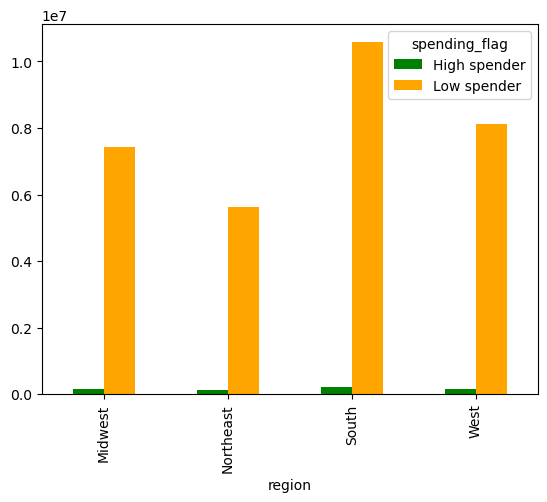

In [26]:
region_based_spending = crosstab.plot.bar(color = ['green', 'orange'])

In [27]:
region_based_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_based_spending.png'))

## 4. Excluding customers with less than 5 orders

In [29]:
result = []

for value in ords_prods_all_secured['Max_order']:
    if value < 5:
        result.append('low activity customer')
    else: 
        result.append('high activity customer')

In [30]:
#creating new column
ords_prods_all_secured['activity_level'] = result

In [31]:
ords_prods_all_secured['activity_level'].value_counts()

activity_level
high activity customer    30964564
low activity customer      1440295
Name: count, dtype: int64

In [32]:
# Check count of 'user_id' without exclusion
ords_prods_all_secured.nunique()

user_id                    206209
gender                          2
state                          51
age                            64
date_joined                  1187
dependants                      4
family_status                   4
income                     108012
product_id                  49659
product_name                49661
aisle_id                      134
department_id                  21
prices                        240
order_id                  3214685
order_number                   99
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
add_to_cart_order             145
reordered                       2
Average_order                  21
Max_order                      99
loyalty_flag                    3
mean_product_price         128315
spending_flag                   2
order_median                   61
order_frequency                 3
age_group                       5
income_group                    3
region        

In [33]:
df_secured_excluded = ords_prods_all_secured[ords_prods_all_secured['activity_level'] != 'low activity customer']

In [34]:
df_secured_excluded.nunique()

user_id                    162631
gender                          2
state                          51
age                            64
date_joined                  1187
dependants                      4
family_status                   4
income                      96069
product_id                  49628
product_name                49630
aisle_id                      134
department_id                  21
prices                        240
order_id                  3064375
order_number                   99
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
add_to_cart_order             145
reordered                       2
Average_order                  21
Max_order                      95
loyalty_flag                    3
mean_product_price         119957
spending_flag                   2
order_median                   61
order_frequency                 3
age_group                       5
income_group                    3
region        

In [35]:
df_secured_excluded.shape #row numbers matches from the value count of high-activity customers

(30964564, 31)

In [36]:
# Export data
df_secured_excluded.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'secured_excluded.pkl'))

## Customer Profiling

1. Create a profiling variable based on age, income, certain goods ordered, and number of dependents.
2. Analysis of “orders_day_of_week” and “order_hour_of_day” based on customer profiles.


In [39]:
df_secured_excluded.describe()

C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\hp\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\hp\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\nano

,user_id,age,dependants,income,product_id,aisle_id,department_id,prices,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,Average_order,Max_order,mean_product_price,order_median
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.095969e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,30964564.0,30964564.0,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.029284e+05,4.946803e+01,1.501819e+00,9.967587e+04,2.559850e+04,7.118859e+01,9.922365e+00,7.790596e+00,1.710317e+06,1.783414e+01,2.741397e+00,1.341098e+01,1.023033e+01,NaN,NaN,1.714540e+01,3.442569e+01,1.193353e+01,9.337755e+00
std,5.947061e+04,1.848528e+01,1.118896e+00,4.314187e+04,1.408096e+04,3.822194e+01,6.282441e+00,4.109726e+00,9.873785e+05,1.763442e+01,2.089254e+00,4.248845e+00,8.309532e+00,0.0,0.0,8.646924e-01,2.489504e+01,7.990331e+01,6.033489e+00
min,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-128.0,0.0,1.521575e+01,5.000000e+00,1.000000e+00,0.000000e+00
25%,5.140900e+04,3.300000e+01,1.000000e+00,6.729200e+04,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.554120e+05,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,3.0,0.0,1.658354e+01,1.400000e+01,7.392889e+00,6.000000e+00
50%,1.025860e+05,4.900000e+01,2.000000e+00,9.676500e+04,2.528800e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710404e+06,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.0,1.0,1.722580e+01,2.800000e+01,7.825143e+00,7.000000e+00
75%,1.543870e+05,6.500000e+01,3.000000e+00,1.281020e+05,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565206e+06,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,11.0,1.0,1.781140e+01,4.800000e+01,8.249597e+00,1.100000e+01
max,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,127.0,1.0,2.290238e+01,9.900000e+01,1.500694e+04,3.000000e+01


### Profiling based on age

In [41]:
df_secured_excluded['age_group'].value_counts()

age_group
old adults      9690051
adults          9214451
senior          8195544
young adults    3415194
other            449324
Name: count, dtype: int64

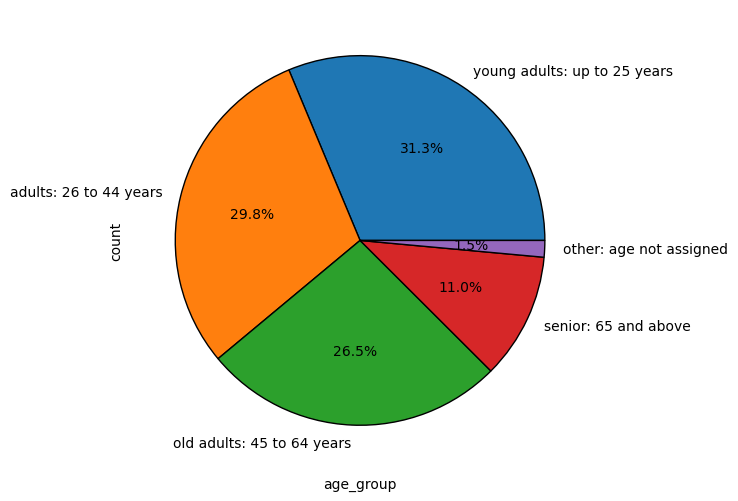

In [42]:
# Creating Pie Chart of Age Groups
age_group_counts = df_secured_excluded['age_group'].value_counts()

# Plot the pie chart
age_group_counts.plot(figsize=(6, 6))
age_group_pie_chart = age_group_counts.plot.pie(
    labels=['young adults: up to 25 years', 'adults: 26 to 44 years', 'old adults: 45 to 64 years', 'senior: 65 and above', 'other: age not assigned'],
    autopct='%.1f%%',
    wedgeprops={'edgecolor': 'black'}
)


In [43]:
age_group_pie_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Pie_chart_age_4.10.png'))

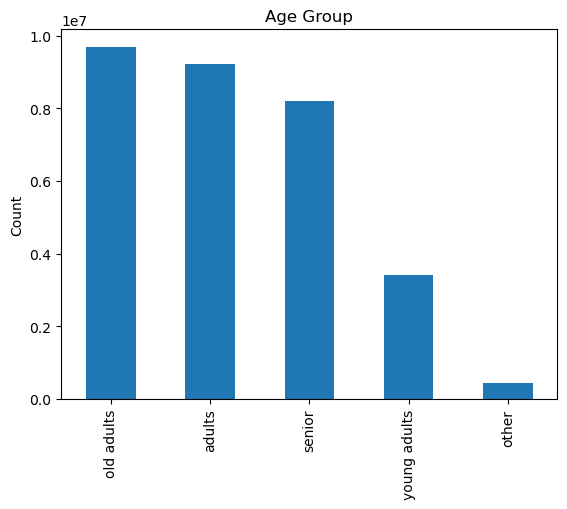

In [44]:
age_group_bar = age_group_counts.plot.bar()
plt.title('Age Group')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout

# Wrap the x-tick labels
labels = [label.get_text() for label in age_group_bar.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, 10) for label in labels]
age_group_bar.set_xticklabels(wrapped_labels, rotation=0)

plt.show()

In [45]:
age_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_age_4.10.png'))

### Profiling based on income

In [47]:
income_group_bar = df_secured_excluded['income_group'].value_counts()

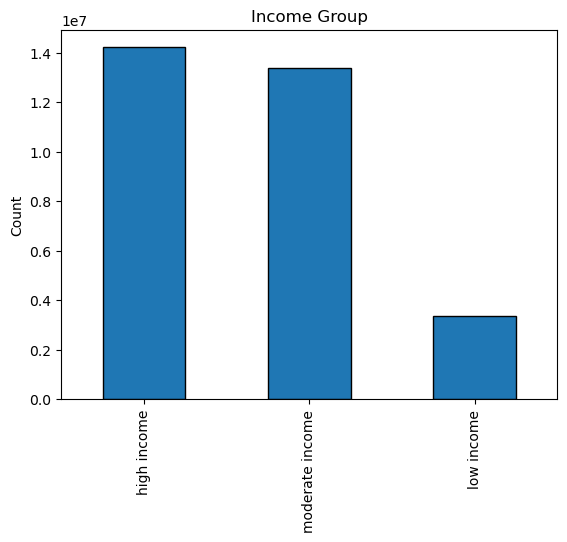

In [48]:
income_group_bar = income_group_bar.plot.bar(edgecolor='black')
plt.title('Income Group')
plt.xlabel('')
plt.ylabel('Count')

plt.tight_layout
plt.show()

In [49]:
income_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_income_4.10.png'))

### Profiling based on dependant

In [51]:
result = []

for dependants in df_secured_excluded['dependants']: 
    if dependants <= 1:
        result.append('small')
    elif dependants == 2:
        result.append('medium')
    elif dependants >= 3:
        result.append('large')
    else:
        result.append('No data')

df_secured_excluded['dependants_category'] = result
df_secured_excluded['dependants_category'].value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_17932\3155879393.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_secured_excluded['dependants_category'] = result


dependants_category
small     15458787
large      7772516
medium     7733261
Name: count, dtype: int64

Text(0, 0.5, '')

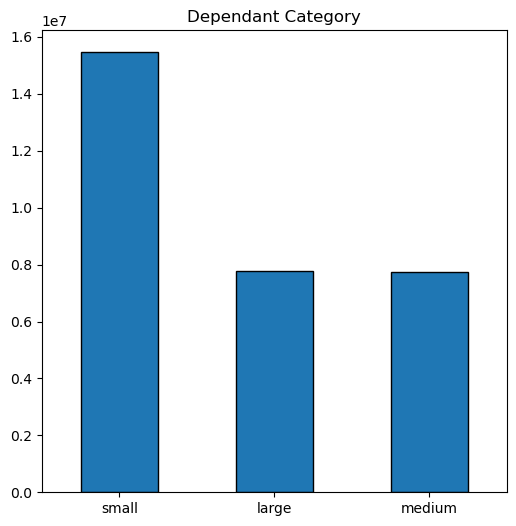

In [52]:
# Creating Bar Chart of Dependants Groups
dependants_group_counts = df_secured_excluded['dependants_category'].value_counts()
plt.figure(figsize=(6,6))
dependant_category_bar = dependants_group_counts.plot.bar(edgecolor='black', rot=0)
plt.title('Dependant Category')
plt.xlabel('')
plt.ylabel('')


In [53]:
dependant_category_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_dependant_4.10.png'))

In [54]:
df_secured_excluded = df_secured_excluded.rename(columns={'order_dow': 'order_day_of_week'})

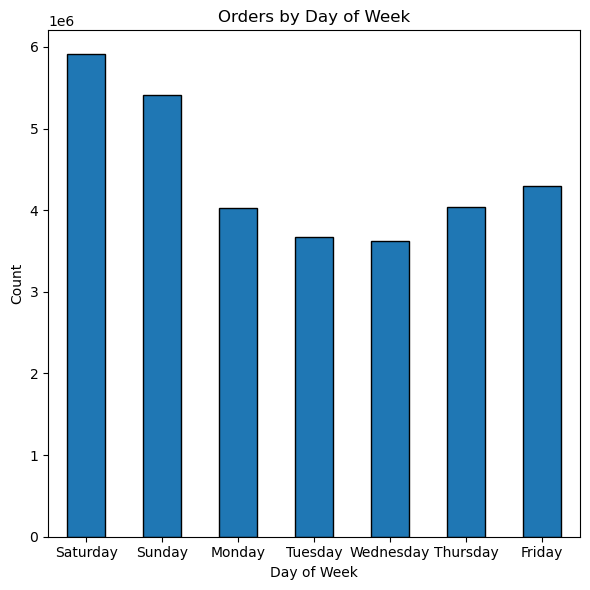

In [55]:
# Creating day names
day_names = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Creating Bar Chart
plt.figure(figsize=(6, 6))
ords_day_by_week = df_secured_excluded['order_day_of_week'].value_counts().sort_index().plot.bar(edgecolor='black', rot=0)
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])
plt.tight_layout()
plt.show()

In [56]:
ords_day_by_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ords_day_by_week_4.10.png'))

## Weekend/Weekday Order Analysis

In [58]:
result = []

for order_day_of_week in df_secured_excluded['order_day_of_week']: 
    if order_day_of_week in [0, 1]:  # 0 and 1 represent the weekend days
        result.append('weekend')
    elif order_day_of_week in [2, 3, 4, 5, 6]:  # 2-6 represent the weekday days
        result.append('weekday')
    else:
        result.append('No day assigned')

df_secured_excluded['order_dow_weekend'] = result
df_secured_excluded['order_dow_weekend'].value_counts()


order_dow_weekend
weekday    19644268
weekend    11320296
Name: count, dtype: int64

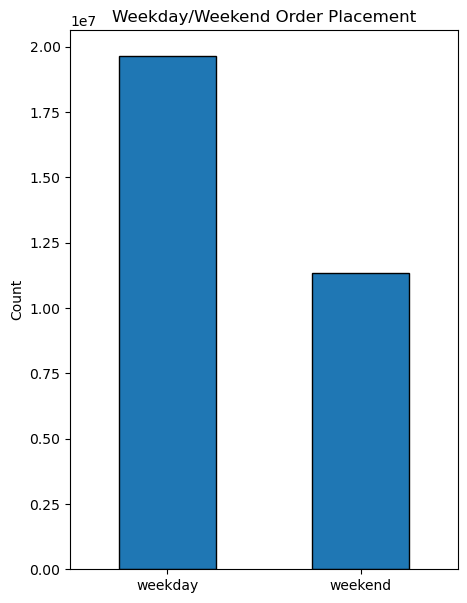

In [59]:
# Creating Bar Chart of Weekday Order Groups
order_dow_weekend_count = df_secured_excluded['order_dow_weekend'].value_counts()
plt.figure(figsize=(5,7))
order_dow_weekend_count_bar = order_dow_weekend_count.plot.bar(edgecolor='black', rot=0)
plt.title('Weekday/Weekend Order Placement')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()

In [60]:
order_dow_weekend_count_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ords_weekday_weekend_4.10.png'))

## Order by daily hour

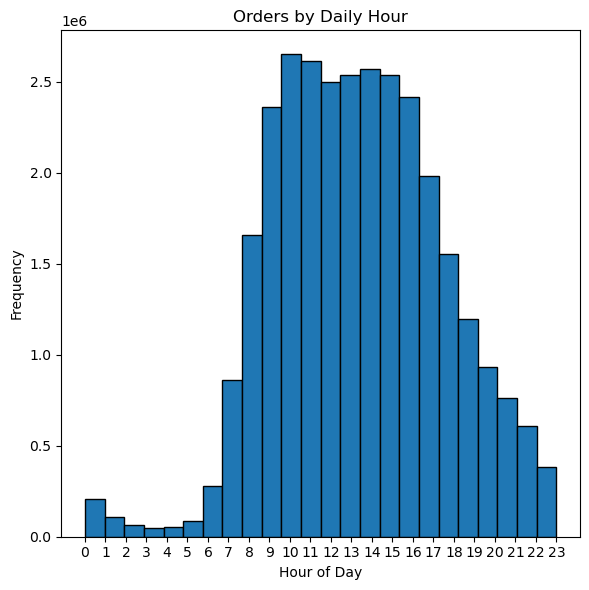

In [62]:
plt.figure(figsize=(6, 6))
ords_hour_by_day=df_secured_excluded['order_hour_of_day'].plot.hist(bins=24, edgecolor='black')
plt.title('Orders by Daily Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [63]:
#exporting histogram
ords_hour_by_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','ords_hour_by_day_hist.png'))

## Orders based on marital status

In [65]:
df_secured_excluded['family_status'].value_counts()

family_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [66]:
# Define get_dependents
def get_dependants(dependants):
    if dependants > 0:
        return 'Has dependants'
    else:
        return 'No dependants'

# Apply the dependents_flag function
df_secured_excluded['dependants_flag'] = df_secured_excluded['dependants'].apply(get_dependants)

In [67]:
df_secured_excluded['dependants_flag'].value_counts()

dependants_flag
Has dependants    23224883
No dependants      7739681
Name: count, dtype: int64

In [118]:
# Define the function to create profiles
def create_profile(row):
    return f"{row['family_status']}, {row['dependants_flag']}"

# Apply the function to create a new column 'customer_profile'
df_secured_excluded['customer_profile'] = df_secured_excluded.apply(create_profile, axis=1)

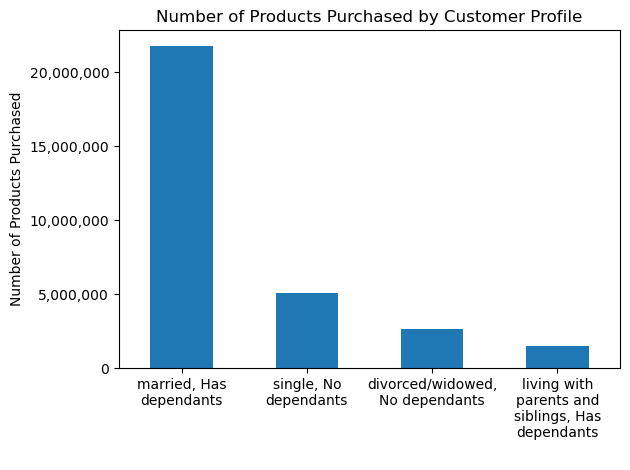

In [120]:
import textwrap

# Create chart showing distribution of customers by 'customer_profile'
counts = df_secured_excluded['customer_profile'].value_counts()
ax = counts.plot.bar()

plt.title('Number of Products Purchased by Customer Profile')
plt.xlabel(' ')
plt.ylabel('Number of Products Purchased')

# Format y-axis values
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))

# Wrap text labels
labels = [textwrap.fill(label, width=17) for label in counts.index]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0, ha='center')

plt.tight_layout()  # Adjust layout to fit labels

bar_customer_profile = plt.gcf()

In [122]:
#exporting histogram
ax.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','customer_profile_bar.png'))

## Family status vs age group

In [136]:
crosstab_family = pd.crosstab(df_secured_excluded['family_status'], df_secured_excluded['age_group'], dropna = False)

In [137]:
print(crosstab_family)

age_group                          adults  old adults   other   senior  \
family_status                                                            
divorced/widowed                        0      623313       0  2021958   
living with parents and siblings        0           0       0        0   
married                           6901266     7238740  321607  6173586   
single                            2313185     1827998  127717        0   

age_group                         young adults  
family_status                                   
divorced/widowed                             0  
living with parents and siblings       1481172  
married                                1108512  
single                                  825510  


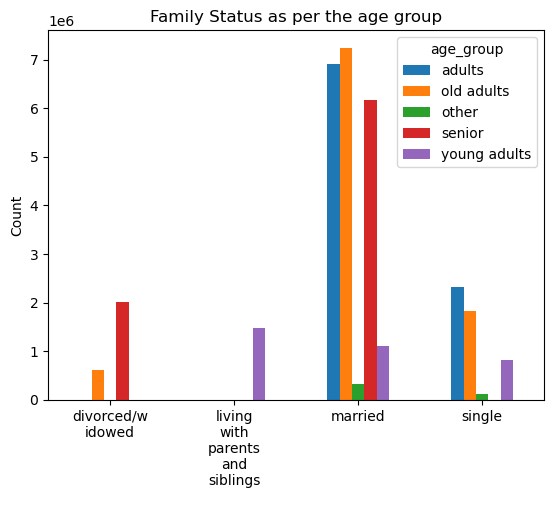

In [130]:
import textwrap

family_based_spending = crosstab_family.plot.bar()
plt.title('Family Status as per the age group')
plt.xlabel(' ')
plt.ylabel('Count')

# Get the current x-tick labels
labels = [label.get_text() for label in family_based_spending.get_xticklabels()]

# Wrap labels
wrapped_labels = [textwrap.fill(label, 10) for label in labels]

# Set the new wrapped labels
family_based_spending.set_xticklabels(wrapped_labels, rotation=0)

# Show the plot
plt.show()

Observations from family status and age_group: Highest orders come from 3 age groups and from married family status - adults, old adults and seniors. Surprisingly, orders from young adults (between age group 0 to 25) who are married are less comparitively. Their order rate remains unaffected if they were married or single.

In [132]:
#exporting the chart
family_based_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_based_spending_4.10.png'))

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [140]:
df_secured_excluded.columns.to_list()

['user_id',
 'gender',
 'state',
 'age',
 'date_joined',
 'dependants',
 'family_status',
 'income',
 'product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'order_number',
 'order_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'Average_order',
 'Max_order',
 'loyalty_flag',
 'mean_product_price',
 'spending_flag',
 'order_median',
 'order_frequency',
 'age_group',
 'income_group',
 'region',
 'activity_level',
 'dependants_category',
 'order_dow_weekend',
 'dependants_flag',
 'customer_profile']

In [142]:
df_secured_excluded.fillna({'prices': 0}, inplace=True)  # Replace NaN with 0 or handle as needed

In [144]:
df_secured_excluded['prices'] = pd.to_numeric(df_secured_excluded['prices'], errors='coerce').astype('float64')


In [146]:
# Creating aggregation subset for customer profile
customer_profile = df_secured_excluded.groupby(['user_id', 'gender', 'state', 'dependants', 'family_status', 'order_number', 'order_day_of_week', 'order_hour_of_day', 'loyalty_flag', 'order_frequency', 'age_group', 'income_group', 'region', 'dependants_category', 'spending_flag'])['prices'].sum().reset_index()



In [148]:
customer_profile.head()

,user_id,gender,state,dependants,family_status,order_number,order_day_of_week,order_hour_of_day,loyalty_flag,order_frequency,age_group,income_group,region,dependants_category,spending_flag,prices
0,1.0,Female,Alabama,3,married,1,2,8,New Customer,Regular customer,adults,low income,South,large,Low spender,31.600000
1,1.0,Female,Alabama,3,married,2,3,7,New Customer,Regular customer,adults,low income,South,large,Low spender,35.400000
2,1.0,Female,Alabama,3,married,3,3,12,New Customer,Regular customer,adults,low income,South,large,Low spender,28.200001
3,1.0,Female,Alabama,3,married,4,4,7,New Customer,Regular customer,adults,low income,South,large,Low spender,26.000000
4,1.0,Female,Alabama,3,married,5,4,15,New Customer,Regular customer,adults,low income,South,large,Low spender,57.000001


In [150]:
customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'order_day_of_week': ['max', 'min', 'mean'], 
                                                    'order_hour_of_day': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [152]:
customer_agg

order_number           order_day_of_week                \
                  max min  mean               max min      mean   
user_id                                                           
1.0                10   1   5.5                 4   1  2.500000   
2.0                14   1   7.5                 5   1  2.142857   
3.0                12   1   6.5                 3   0  1.083333   
4.0                 5   1   3.0                 6   4  4.800000   
7.0                20   1  10.5                 6   0  1.850000   
...               ...  ..   ...               ...  ..       ...   
206203.0            5   1   3.0                 5   0  1.800000   
206206.0           67   1  34.0                 6   0  2.477612   
206207.0           16   1   8.5                 6   0  2.562500   
206208.0           49   1  25.0                 6   0  2.653061   
206209.0           13   1   7.0                 5   0  2.769231   

         order_hour_of_day                     prices                          
                       max min       mean         max         min        mean  
user_id                                                                        
1.0                     16   7  10.300000   63.100001   25.000000   37.570000  
2.0                     15   9  10.571429  213.100000   19.000000  104.685714  
3.0                     19  14  16.416667  107.200001   30.700000   60.116667  
4.0                     15  11  12.600000   63.400001   10.800000   29.540000  
7.0                     20   7  13.600000  166.700002    6.300000   76.910001  
...                    ...  ..        ...         ...         ...         ...  
206203.0                18  13  15.600000  216.300002  126.600001  169.900000  
206206.0                20   9  16.731343  157.300000    9.600000   32.526866  
206207.0                21   4  12.500000  200.800003   42.800000  101.931251  
206208.0                23   4  14.265306  238.500001   38.700000  115.595919  
206209.0                18  10  13.615385  131.500001   11.100000   70.046154  

[162631 rows x 12 columns]

In [154]:
# Creating aggregation by income_group for order_number & prices
income_group_agg = customer_profile.groupby('income_group').agg({'order_number':['mean','min','max'],'prices':['mean','min','max']})

In [156]:
income_group_agg

order_number             prices                  
                        mean min max       mean  min          max
income_group                                                     
high income        18.164700   1  99  83.862662  0.0  1092.199997
low income         16.455425   1  99  52.629435  1.0   875.000007
moderate income    18.159834   1  99  81.994559  0.0   852.500001

In [158]:
# Creating aggregation by dependant_category for order_number & prices
dependant_size_agg = customer_profile.groupby('dependants_category').agg({'order_number':['mean','min','max'],'prices':['mean','min','max']})

In [160]:
dependant_size_agg

order_number             prices                  
                            mean min max       mean  min          max
dependants_category                                                  
large                  17.976402   1  99  78.692147  0.0  1092.199997
medium                 17.844847   1  99  78.839964  0.0   846.100001
small                  17.936360   1  99  78.652410  0.0   875.000007

In [162]:
# Creating aggregation by gender for order_frequency & prices
gender_agg = customer_profile.groupby('gender').agg({'dependants':['mean','min','max'],'prices':['mean','min','max']})

8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [164]:
# Creating crosstab to compare age_group profile with region locations
age_region_comparison = pd.crosstab(df_secured_excluded['age_group'], df_secured_excluded['region'], dropna=False)